Import data science packages


In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt


# Create the FrozenLake environment
env = gym.make('FrozenLake-v1',is_slippery=False)
env.seed(42)

[42]

In [ ]:
discount_factor = 0.9

Check the transition probability value for a single test

Environment details:
Action Space: Discrete(4)
Observation Space: Discrete(16)
State Space Size: 16
Action Space Size: 4

Environment:


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
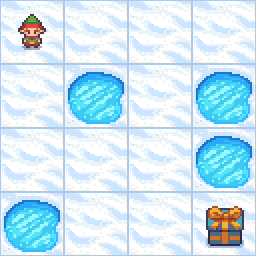

In [ ]:
# Print the details of the environment
print("Environment details:")
print("Action Space:", env.action_space)
print("Observation Space:", env.observation_space)
print("State Space Size:", env.observation_space.n)
print("Action Space Size:", env.action_space.n)
print("\nEnvironment:")
env.reset()
env.render(mode='rgb_array')


In [ ]:
# Initialize policy and value tables
num_states = env.observation_space.n
num_actions = env.action_space.n

# Initialize a policy with equal probability for either direction
policy = np.ones((num_states, num_actions)) / num_actions

# Initialize the value table with zeros
value_table = np.zeros(num_states)

print("Initial Policy:\n", policy)
print("\nInitial Value Table:\n", value_table)


Initial Policy:
 [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]

Initial Value Table:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


We will now do policy evaluation phase (bellman equations)

In [ ]:
env.P[12]

{0: [(1.0, 12, 0, True)],
 1: [(1.0, 12, 0, True)],
 2: [(1.0, 12, 0, True)],
 3: [(1.0, 12, 0, True)]}

In [ ]:
def policy_evaluation(env, policy, value_table, discount_factor=0.9, theta=1e-9):
    """
    Policy Evaluation: Iteratively evaluates the value function under the given policy.

    Args:
        env: The environment object (FrozenLake in this case).
        policy: The policy to evaluate.
        value_table: A numpy array to store the value function for each state.
        discount_factor: The discount factor (gamma).
        theta: A small threshold to determine when to stop evaluation.

    Returns:
        The updated value_table which represents the state values under the given policy.
    """
    iteration_number = 0
    while True:  # Repeat until convergence
        print("Iteration:", iteration_number)
        iteration_number += 1
        delta = 0  # Initialize the maximum change in value function
        for state in range(env.observation_space.n):  # Iterate over all states
            v = 0  # Initialize the new value for the current state
            for action, action_prob in enumerate(policy[state]):  # Iterate over all actions in the policy for the current state
                for prob, next_state, reward, done in env.P[state][action]:  # Iterate over the transition probabilities for the given state-action pair
                    # Calculate the expected value for the current state-action pair
                    v += action_prob * prob * (reward + discount_factor * value_table[next_state])
            # Calculate the change in value for the current state
            delta = max(delta, np.abs(value_table[state] - v))
            # Update the value function for the current state.
            value_table[state] = v
            print(f"{v:.2f}", end=",")
        print()
        # If the maximum change is less than the threshold, stop evaluation
        if delta < theta:
            print("Policy Evaluation Completed")
            print(delta)
            break
    return value_table  # Return the updated value table

# Evaluate the policy
value_table = policy_evaluation(env, policy, value_table)

print("Value Table after Policy Evaluation:\n", value_table)


Iteration: 0
0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,
Iteration: 1
0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.06,0.33,0.00,
Iteration: 2
0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.03,0.08,0.00,0.00,0.09,0.36,0.00,
Iteration: 3
0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0.04,0.10,0.00,0.00,0.11,0.38,0.00,
Iteration: 4
0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.01,0.05,0.10,0.00,0.00,0.12,0.39,0.00,
Iteration: 5
0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.01,0.05,0.10,0.00,0.00,0.13,0.39,0.00,
Iteration: 6
0.00,0.00,0.01,0.00,0.00,0.00,0.03,0.00,0.02,0.06,0.11,0.00,0.00,0.13,0.39,0.00,
Iteration: 7
0.00,0.00,0.01,0.00,0.00,0.00,0.03,0.00,0.02,0.06,0.11,0.00,0.00,0.13,0.39,0.00,
Iteration: 8
0.00,0.00,0.01,0.00,0.01,0.00,0.03,0.00,0.02,0.06,0.11,0.00,0.00,0.13,0.39,0.00,
Iteration: 9
0.00,0.00,0.01,0.00,0.01,0.00,0.03,0.00,0.02,0.06,0.11,0.00,0.00,0.13,0.39,0.00,
Iteration: 10
0.00,0.00,0.01,0.00,0.01,0.00,0.03,0.00,0.02,0

Next is the policy improvement ($\pi$) phase

In [ ]:
def policy_improvement(env, policy, value_table, discount_factor=0.9):
    """
    Policy Improvement: Updates the policy based on the current value function.

    Args:
        env: The environment object (FrozenLake in this case).
        policy: The current policy to improve.
        value_table: The value function for each state.
        discount_factor: The discount factor (gamma).

    Returns:
        The updated policy.
    """
    policy_stable = True
    num_states = env.observation_space.n
    num_actions = env.action_space.n

    for state in range(num_states):
        old_action = np.argmax(policy[state])
        action_values = np.zeros(num_actions)

        # Compute the value for each action in the current state
        for action in range(num_actions):
            action_value = 0
            for prob, next_state, reward, done in env.P[state][action]:
                action_value += prob * (reward + discount_factor * value_table[next_state])
            action_values[action] = action_value

        # Choose the best action and update the policy
        best_action = np.argmax(action_values)
        policy[state] = np.zeros(num_actions)
        policy[state][best_action] = 1.0

        # Check if the policy has changed
        if old_action != best_action:
            policy_stable = False

    return policy, policy_stable

# Improve the policy based on the value table
policy, policy_stable = policy_improvement(env, policy, value_table)

print("Improved Policy:\n", policy)
print("\nIs Policy Stable?", policy_stable)


Improved Policy:
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]

Is Policy Stable? False



We now need to combine Policy Evaluation and Policy Improvement into a Policy Iteration loop. This will iteratively improve the policy until it converges (i.e., when the policy becomes stable).

In [ ]:
def policy_iteration(env, discount_factor, theta=1e-9):
    """
    Policy Iteration: Alternates between policy evaluation and policy improvement
    until the policy is stable.

    Args:
        env: The environment object (FrozenLake in this case).
        discount_factor: The discount factor (gamma).
        theta: A small threshold to determine when to stop evaluation.

    Returns:
        The optimal policy and the value function for each state.
    """
    num_states = env.observation_space.n
    num_actions = env.action_space.n

    # Initialize policy and value table
    policy = np.ones((num_states, num_actions)) / num_actions
    value_table = np.zeros(num_states)

    is_policy_stable = False
    while not is_policy_stable:
        # Policy Evaluation
        value_table = policy_evaluation(env, policy, value_table, discount_factor, theta)

        # Policy Improvement
        policy, is_policy_stable = policy_improvement(env, policy, value_table, discount_factor)

    return policy, value_table

# Perform Policy Iteration
optimal_policy, optimal_value_table = policy_iteration(env,discount_factor)

print("Optimal Policy:\n", optimal_policy)
print("\nOptimal Value Table:\n", optimal_value_table)


Iteration: 0
0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,
Iteration: 1
0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.06,0.33,0.00,
Iteration: 2
0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.03,0.08,0.00,0.00,0.09,0.36,0.00,
Iteration: 3
0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0.04,0.10,0.00,0.00,0.11,0.38,0.00,
Iteration: 4
0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.01,0.05,0.10,0.00,0.00,0.12,0.39,0.00,
Iteration: 5
0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.01,0.05,0.10,0.00,0.00,0.13,0.39,0.00,
Iteration: 6
0.00,0.00,0.01,0.00,0.00,0.00,0.03,0.00,0.02,0.06,0.11,0.00,0.00,0.13,0.39,0.00,
Iteration: 7
0.00,0.00,0.01,0.00,0.00,0.00,0.03,0.00,0.02,0.06,0.11,0.00,0.00,0.13,0.39,0.00,
Iteration: 8
0.00,0.00,0.01,0.00,0.01,0.00,0.03,0.00,0.02,0.06,0.11,0.00,0.00,0.13,0.39,0.00,
Iteration: 9
0.00,0.00,0.01,0.00,0.01,0.00,0.03,0.00,0.02,0.06,0.11,0.00,0.00,0.13,0.39,0.00,
Iteration: 10
0.00,0.00,0.01,0.00,0.01,0.00,0.03,0.00,0.02,0

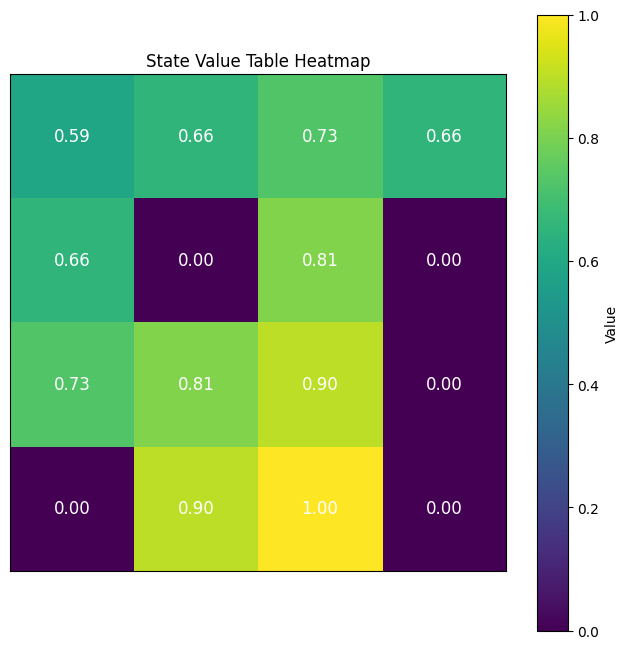

In [ ]:
def plot_value_table(value_table, num_rows, num_cols):
    """
    Plot the value table as a heatmap.

    Args:
        value_table: The value table for each state.
        num_rows: Number of rows in the FrozenLake grid.
        num_cols: Number of columns in the FrozenLake grid.
    """
    # Reshape the value table to match the grid dimensions
    value_grid = np.reshape(value_table, (num_rows, num_cols))

    plt.figure(figsize=(8, 8))
    plt.imshow(value_grid, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Value')

    # Add value annotations
    for r in range(num_rows):
        for c in range(num_cols):
            plt.text(c, r, f'{value_grid[r, c]:.2f}', ha='center', va='center', fontsize=12, color='white')

    plt.title('State Value Table Heatmap')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.show()

# Plot the value table for the FrozenLake environment
num_rows = 4  # FrozenLake is typically a 4x4 grid
num_cols = 4
plot_value_table(optimal_value_table, num_rows, num_cols)


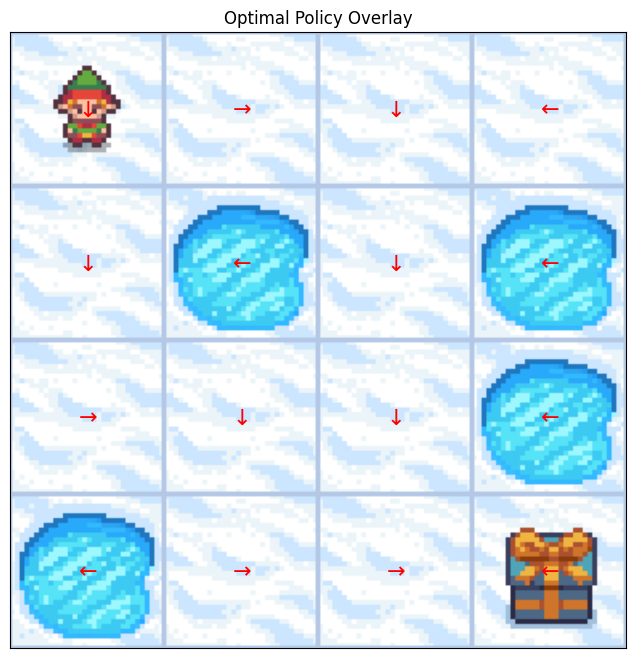

In [ ]:
import matplotlib.patches as patches
from PIL import Image

def render_env_with_policy(env, policy, filename='policy_render.png'):
    """
    Renders the environment and overlays the policy directions on the image.

    Args:
        env: The environment object (FrozenLake in this case).
        policy: The policy matrix (one-hot encoded).
        filename: Name of the file to save the rendered image.
    """
    # Get the environment's rendered image
    img = env.render(mode='rgb_array')

    # Reshape the policy to match the grid size of the environment
    grid_size = int(np.sqrt(env.observation_space.n))
    policy_grid = np.argmax(policy, axis=1).reshape((grid_size, grid_size))

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(img)

    # Mapping from action index to direction
    action_map = {0: '←', 1: '↓', 2: '→', 3: '↑'}

    # Add policy directions to the rendered image
    for i in range(grid_size):
        for j in range(grid_size):
            direction = action_map[policy_grid[i, j]]
            ax.text(j * (img.shape[1] // grid_size) + (img.shape[1] // (2 * grid_size)),
                    i * (img.shape[0] // grid_size) + (img.shape[0] // (2 * grid_size)),
                    direction,
                    ha='center', va='center', fontsize=16, color='red')

    ax.set_xticks([])
    ax.set_yticks([])
    plt.title('Optimal Policy Overlay')
    plt.savefig(filename)
    plt.show()

# Render the environment with the optimal policy overlay
render_env_with_policy(env, policy)
